# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/us_indicators.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [3]:
df

,date,cpi,policy_rate,neer,money_supply,inflation_target,type_of_monetary_policy
0,2001-01-31,1.32,1.5,89.24,147.07,inrange,ease
1,2001-02-28,1.44,1.5,90.47,145.49,inrange,ease
2,2001-03-31,1.44,1.5,89.33,140.02,inrange,ease
3,2001-04-30,2.52,1.5,87.32,138.88,inrange,ease
4,2001-05-31,2.76,1.5,87.16,139.49,inrange,ease
...,...,...,...,...,...,...,...
277,2024-02-29,-0.77,2.5,118.51,718.27,outrrange,tight
278,2024-03-31,-0.47,2.5,118.11,711.58,outrrange,tight
279,2024-04-30,0.19,2.5,116.80,695.69,outrrange,tight
280,2024-05-31,1.54,2.5,117.21,702.68,inrange,tight


## Visualization Type

### Comparison

#### Among Items

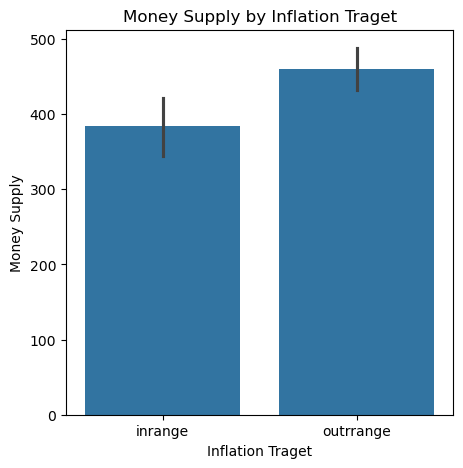

In [4]:
plt.figure(figsize=(5, 5))
sns.barplot(df, x='inflation_target', y='money_supply')
plt.xlabel('Inflation Traget')
plt.ylabel('Money Supply')
plt.title('Money Supply by Inflation Traget')
plt.show()

#### Over Time

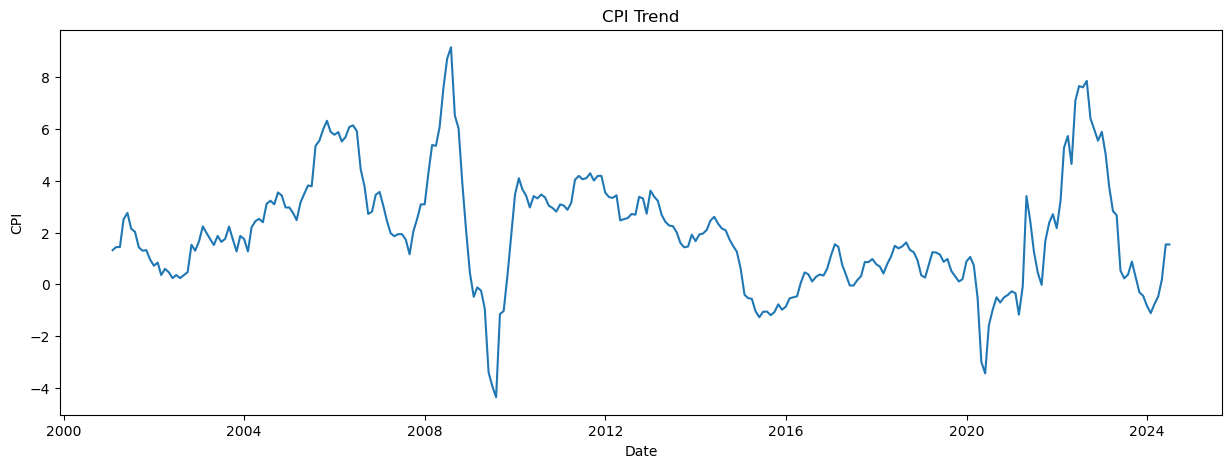

In [5]:
plt.figure(figsize=(15, 5))
sns.lineplot(df, x='date', y='cpi')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI Trend')
plt.show()

### Dispersion

#### Single Group

<Axes: >

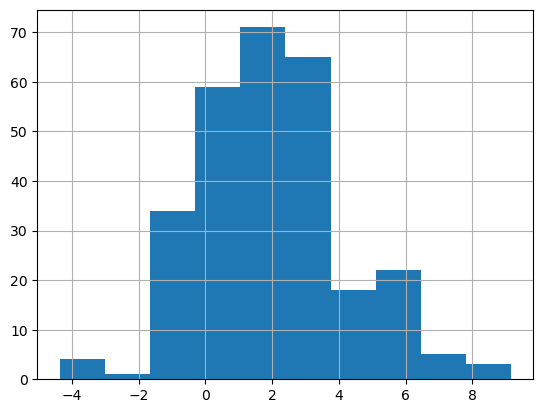

In [6]:
df['cpi'].hist()

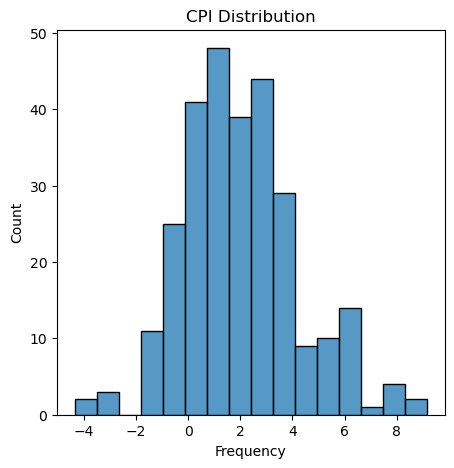

In [7]:
plt.figure(figsize=(5, 5))
sns.histplot(df, x='cpi')
plt.xlabel('Frequency')
plt.title('CPI Distribution')
plt.show()

#### Multiple Groups

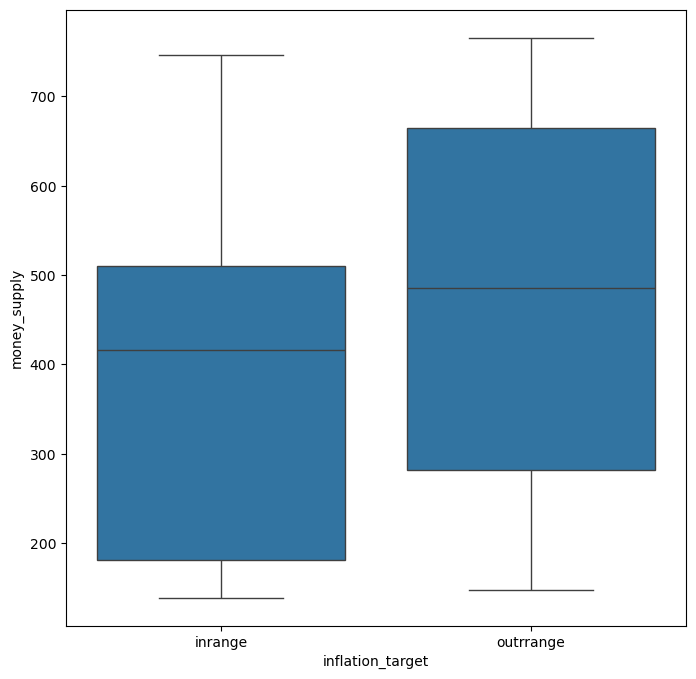

In [8]:
plt.figure(figsize=(8, 8))
sns.boxplot(df, x='inflation_target', y='money_supply')
plt.show()

### Composition

In [9]:
plt_df = df.groupby('type_of_monetary_policy')[['money_supply', 'neer']].mean()
plt_df = plt_df.div(plt_df.sum(axis=1), axis=0)
plt_df = plt_df.reset_index()

In [10]:
plt_df

,type_of_monetary_policy,money_supply,neer
0,ease,0.820178,0.179822
1,tight,0.785949,0.214051


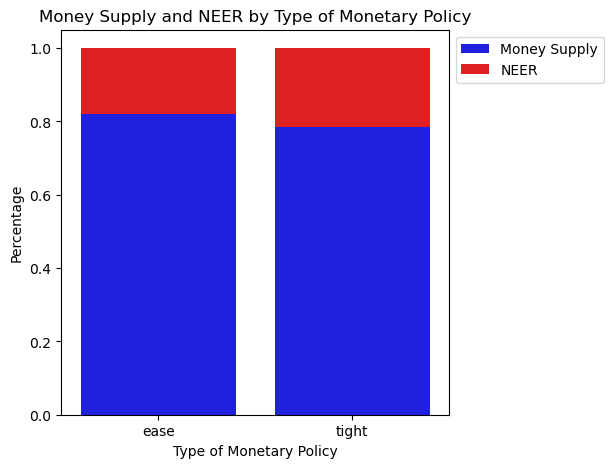

In [11]:
plt.figure(figsize=(5, 5))
sns.barplot(plt_df, x='type_of_monetary_policy', y='money_supply', color='b', label='Money Supply')
sns.barplot(plt_df, x='type_of_monetary_policy', y='neer', bottom=plt_df['money_supply'], color='r', label='NEER')
plt.xlabel('Type of Monetary Policy')
plt.ylabel('Percentage')
plt.title('Money Supply and NEER by Type of Monetary Policy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Relationship

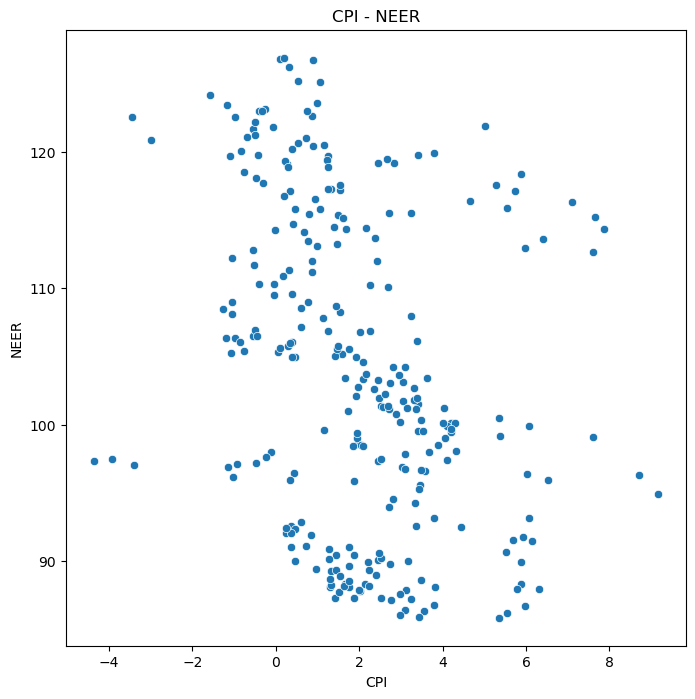

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='cpi', y='neer')
plt.xlabel('CPI')
plt.ylabel('NEER')
plt.title('CPI - NEER')
plt.show()

## Visual Encoding

#### Color Hue

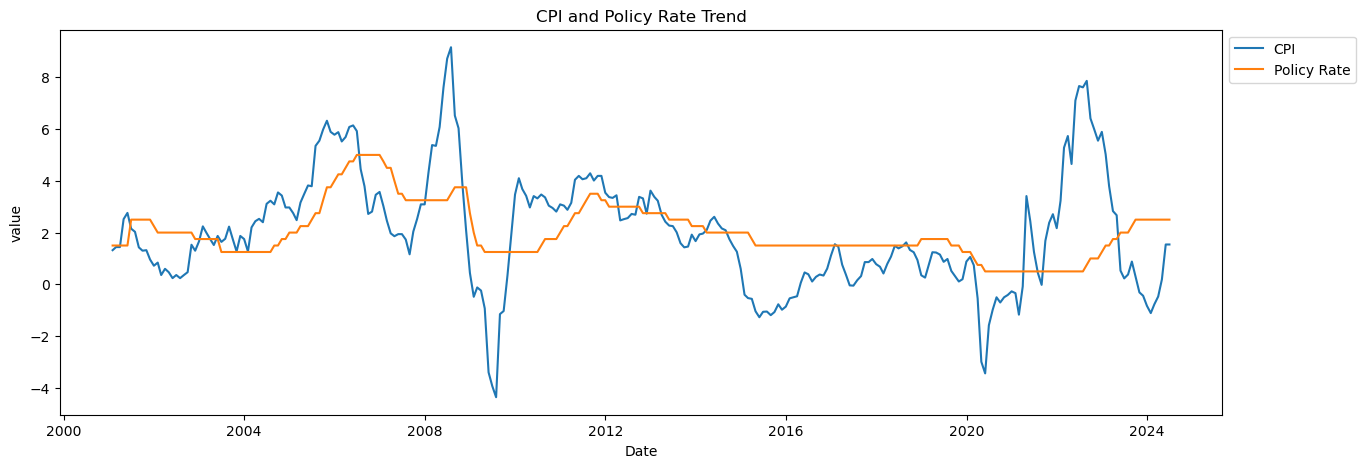

In [13]:
plt.figure(figsize=(15, 5))
sns.lineplot(df, x='date', y='cpi', label='CPI')
sns.lineplot(df, x='date', y='policy_rate', label='Policy Rate')
plt.xlabel('Date')
plt.ylabel('value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CPI and Policy Rate Trend')
plt.show()

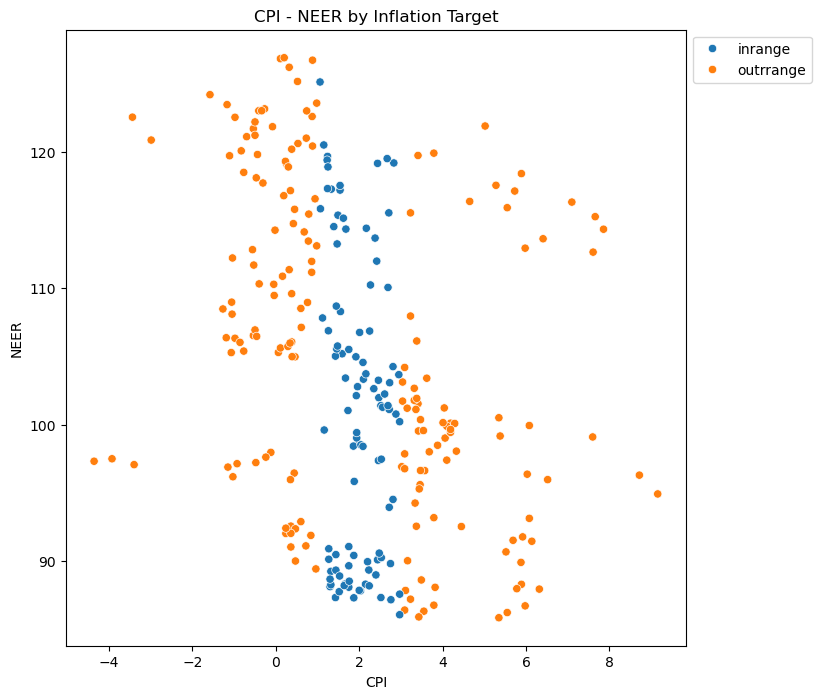

In [14]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='cpi', y='neer', hue='inflation_target')
plt.xlabel('CPI')
plt.ylabel('NEER')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CPI - NEER by Inflation Target')
plt.show()

#### Size

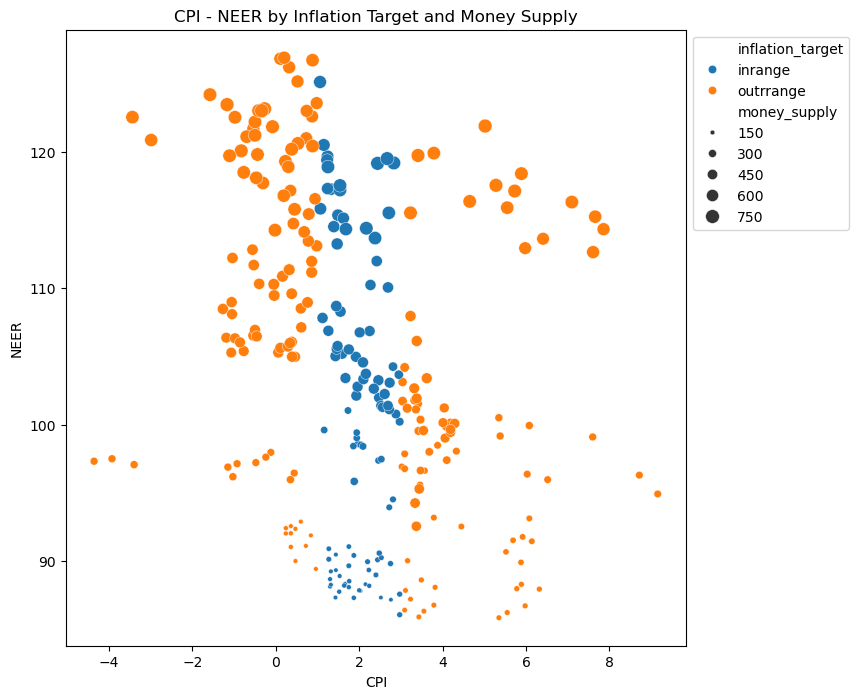

In [15]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='cpi', y='neer', hue='inflation_target', size='money_supply', sizes=(10, 100))
plt.xlabel('CPI')
plt.ylabel('NEER')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CPI - NEER by Inflation Target and Money Supply')
plt.show()

#### Shape

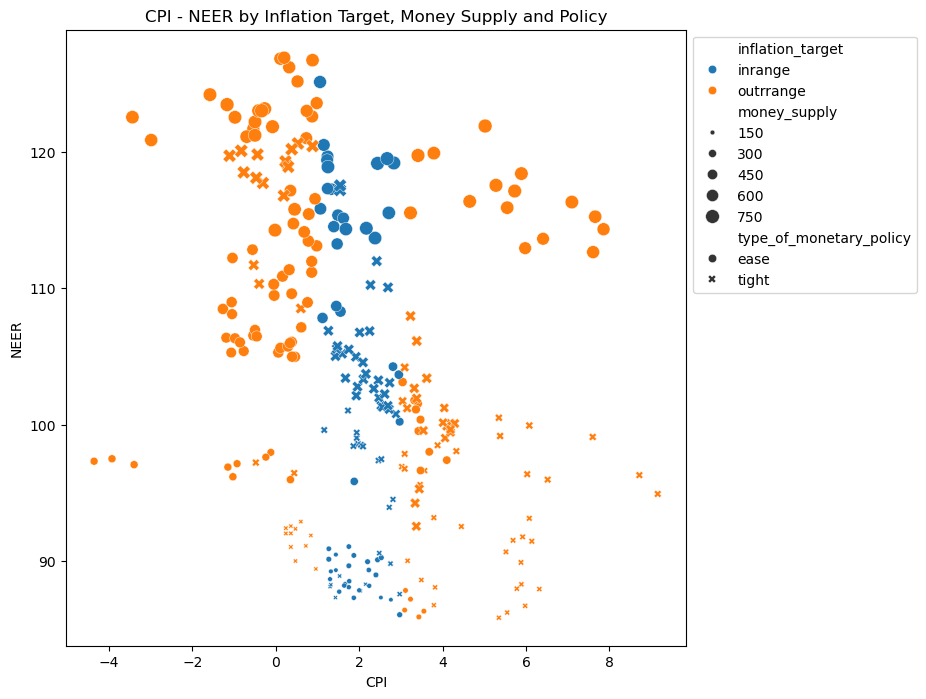

In [16]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='cpi', y='neer', hue='inflation_target', size='money_supply', sizes=(10, 100), style='type_of_monetary_policy')
plt.xlabel('CPI')
plt.ylabel('NEER')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CPI - NEER by Inflation Target, Money Supply and Policy')
plt.show()

#### Color Scale

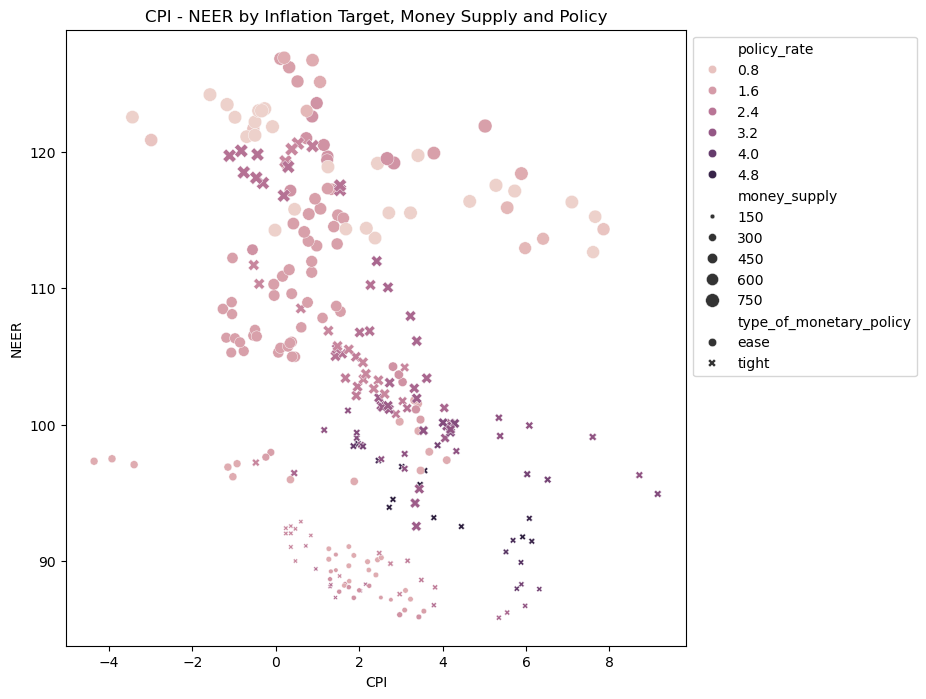

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df, x='cpi', y='neer', hue='policy_rate', size='money_supply', sizes=(10, 100), style='type_of_monetary_policy')
plt.xlabel('CPI')
plt.ylabel('NEER')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CPI - NEER by Inflation Target, Money Supply and Policy')
plt.show()